# ПРАКТИЧЕСКАЯ РАБОТА 12. ЛОГИЧЕСКИЕ МЕТОДЫ КЛАССИФИКАЦИИ

Выполнил студент 2 курса 
Прикладная информатика ПИН-б-о-22-1
Котляров Денис Владимирович

Цель:
изучение принципов построения информационных систем с использованием логических методов классификации

Задачи:
- освоение технологии внедрения алгоритмов на основе решающих списков в приложения
- освоение технологии внедрения алгоритмов на основе решающих деревьев в приложения
- изучение параметров логической классификации
- освоение модификаций логических методов классификации


Для выполнения лабораторной работы был выбран датасет "glass", в котором определены 6 видов стекла по содержанию в нем оксидов.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

Импортируем библиотеки

In [2]:
source_path = 'D:/ИИ_СКФУ_лабы/4_laba/glass.data'
d = pd.read_table(source_path, delimiter=',', header=None, names=['id', 'RI', 'NA',
                                                                  'Mg', 'Al', 'Si',
                                                                  'K', 'Ca', 'Ba',
                                                                  'Fe', 'Type of glass'])

Считаем датасет из файла  в датаврейм, проименуем столбцы 

In [3]:
d.info()
d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   NA             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


,id,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [5]:
dX = d.iloc[:, 1:10]
dY = d['Type of glass']
print(dX.head())
print(dY.head())

        RI     NA    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0
0    1
1    1
2    1
3    1
4    1
Name: Type of glass, dtype: int64


Выберем признаки для обучающих данных

In [6]:
X_train, X_holdout, Y_train, Y_holdout = \
train_test_split(dX, dY, test_size=0.3, random_state=12)

tree = DecisionTreeClassifier(max_depth=5,
                              random_state=21,
                              max_features=2)
tree.fit(X_train, Y_train)

tree_pred = tree.predict(X_holdout)
accur = accuracy_score(Y_holdout, tree_pred)
print(accur)

0.6923076923076923


Разделем обучающие данные на тренировочные и валидационные в пропорцции 0.3, создадим дерево и обучим его на тренировочных данных. Далее оуеним точность работы дерева с помощью метрики accuracy.

Теперь подберем наилучшее значение для одного из параметра дерева - max_depth, с помощью кроссвалидации.

In [7]:
from sklearn.model_selection import cross_val_score

d_list = list(range(1,20))

cv_scores = []

for d in d_list:
    tree = DecisionTreeClassifier(max_depth=d,
                                  random_state=21,
                                  max_features=2)
    scores = cross_val_score(tree, dX, dY, cv =10, scoring='accuracy')
    cv_scores.append(scores.mean())

c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_sp

Вычислим ошибку для каждого значения и построим график

Text(0, 0.5, 'MSE')

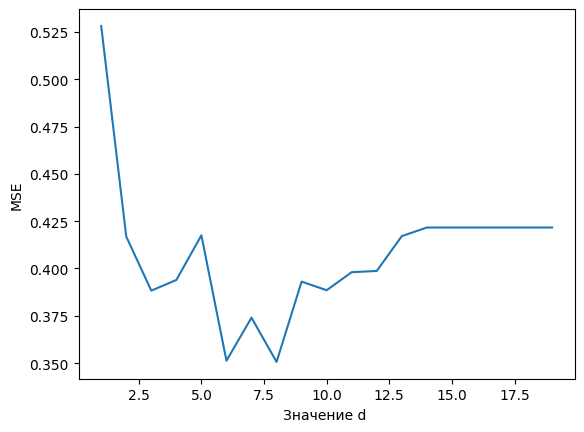

In [8]:
MSE = [1-x for x in cv_scores]
plt.plot(d_list, MSE)
plt.xlabel("Значение d ")
plt.ylabel('MSE')

Найдем наименьшее значение ошибки и соответствующие ей значение параметра max_depth

In [9]:
d_min = min(MSE)
all_d_min = []
for i in range(len(MSE)):
    if MSE[i] <= d_min:
        all_d_min.append(d_list[i])

print(all_d_min)

[8]


In [10]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import tree

Так как у дерева 2 параметра. нам необходимо оптимизировать оба этих параметра. Для этого воспользуемся методом GridSearchCV
Создадим дерево, словарь значений для параметров, которые будут исппользоваться как сетка для поиска оптимальных

In [11]:
dtc = DecisionTreeClassifier(max_depth=10, random_state=21, max_features=2)

tree_params = {'max_depth': range(1,20), 'max_features': range(1,4)}
tree_grid = GridSearchCV(dtc, tree_params, cv = 10, verbose=True, n_jobs=-1)
tree_grid.fit(dX, dY)

print("\n")
print("Лучшее сочетание параметров: ", tree_grid.best_params_)
print("Лучшие баллы cross validation: ", tree_grid.best_score_)

Fitting 10 folds for each of 57 candidates, totalling 570 fits


c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(




Лучшее сочетание параметров:  {'max_depth': 6, 'max_features': 3}
Лучшие баллы cross validation:  0.7248917748917749


Получили наилучшие параметры для дерева: {'max_depth': 6, 'max_features': 3}
И далее визуализируем полученное дерево

In [12]:
dY.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [24]:
tree.export_graphviz(tree_grid.best_estimator_,
                     feature_names=dX.columns,
                     class_names=dY.unique().astype(str),
                     out_file='glass.dot',
                     filled=True, rounded=True)


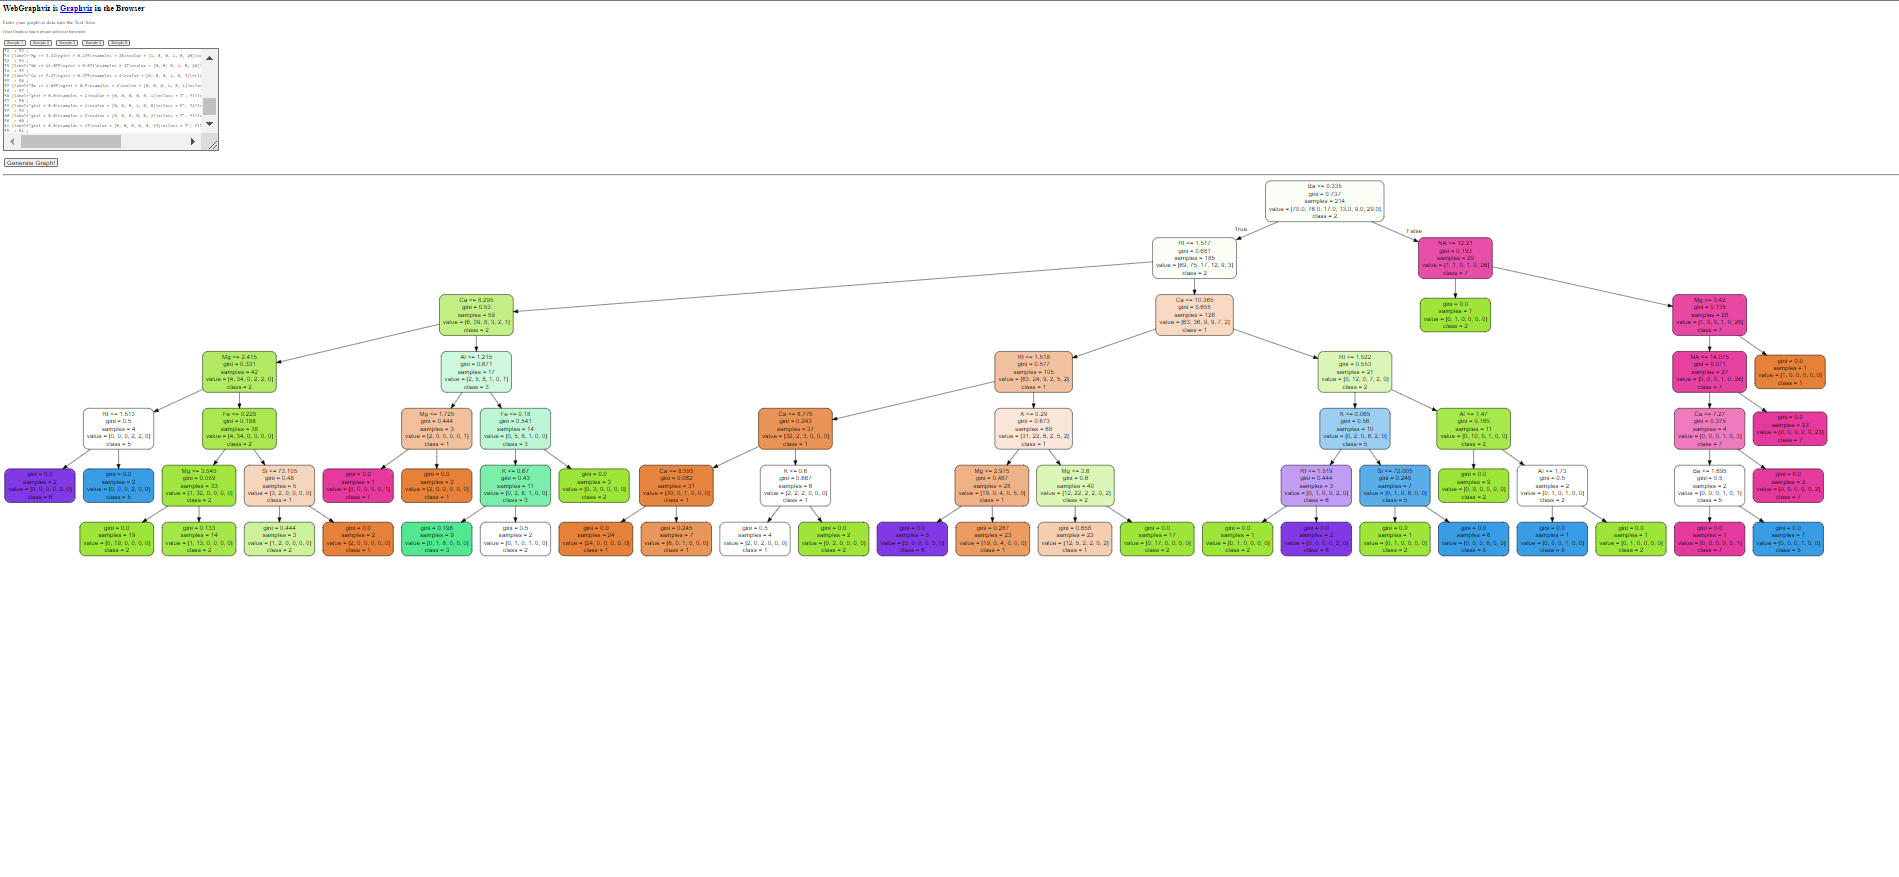

Так как максимальная глубина дерева для оптимальной работы оказалась равна 6, то визуализация дерева получилась объемной

Создадим дерево с полученными параметрами и проверим его


In [18]:
dtc = DecisionTreeClassifier(max_depth=6,
                             random_state=21,
                              max_features=3)
dtc.fit(dX, dY)
res =dtc.predict([[5.1, 3.5, 1.4, 0.2, 30., 3., 5., 6.7, 3.3]])
print(res)

[2]


c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Дерево решений выдало правильный ответ

In [19]:
d = pd.read_csv(source_path, delimiter=',', header=None, names=['id', 'RI', 'NA',
                                                               'Mg', 'Al', 'Si',
                                                               'K', 'Ca', 'Ba',
                                                               'Fe', 'Type of glass'])
d = d.drop(d.columns[0], axis=1)
dX = d.iloc[:, :9]
dY = d['Type of glass']

In [20]:
d.head()

,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Визуализируем отношения различных 5 признаков  в датасете между собой. Разные цвета точек соответствуют различным итоговым классам объектов

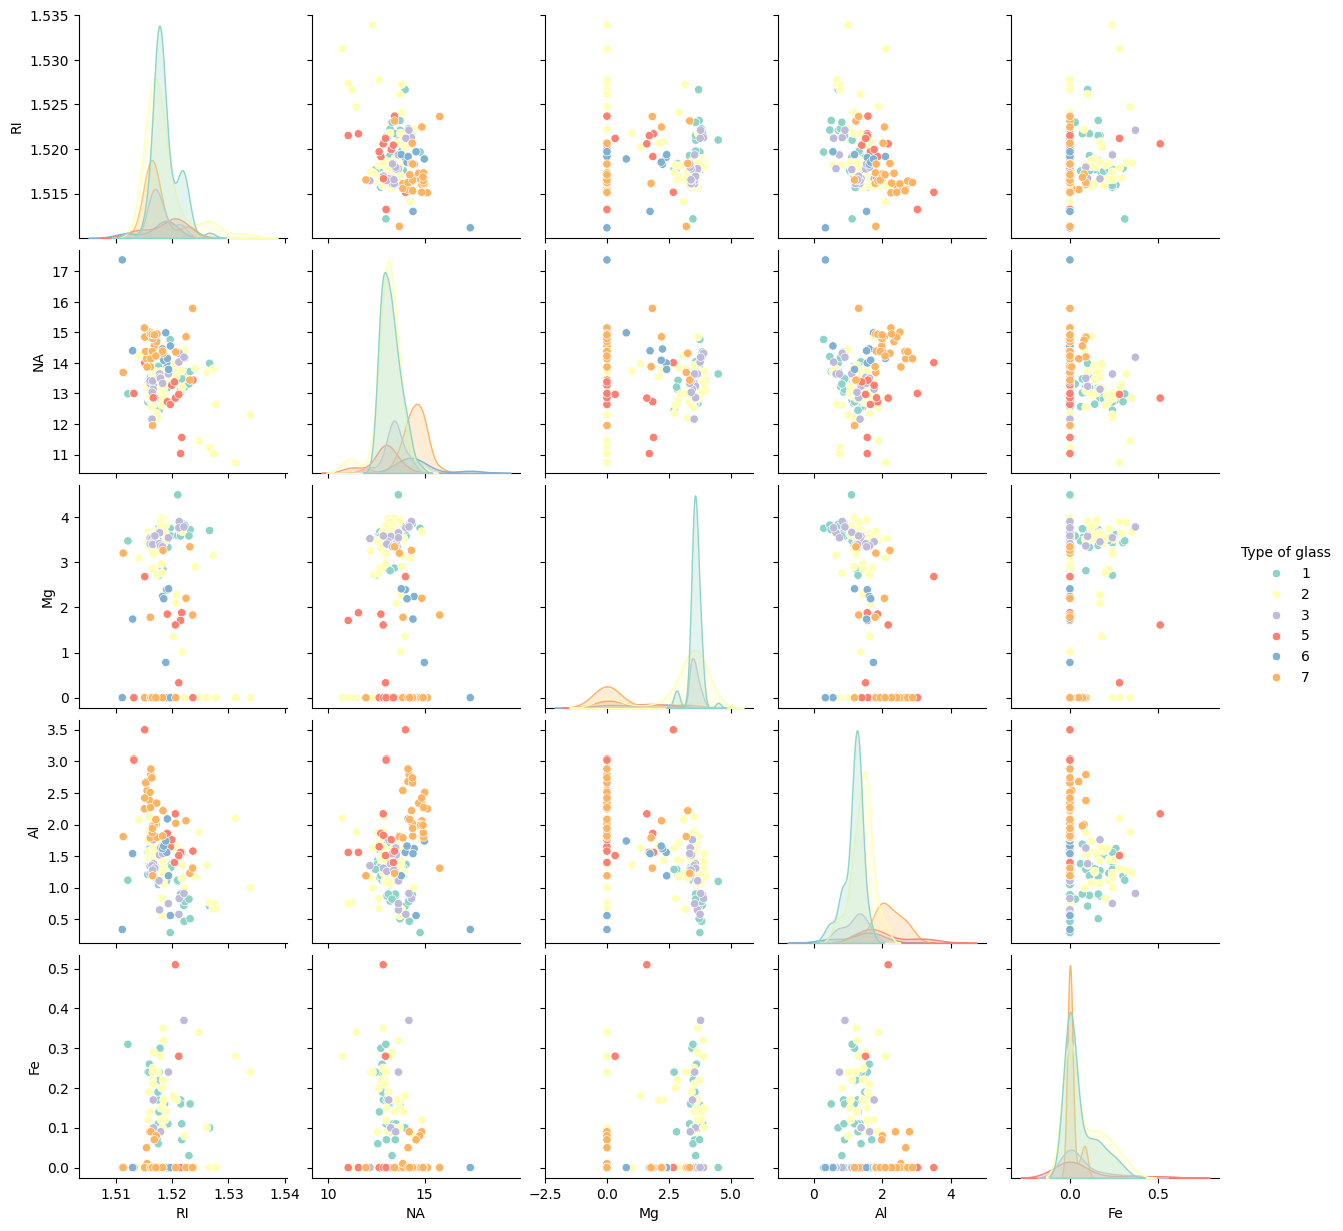

In [21]:
sns.pairplot(d[['RI', 'NA',
                'Mg', 'Al',
                
                'Fe', 'Type of glass']], hue = 'Type of glass', palette='Set3')

In [57]:
dY.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

Для понимания полной картины датасета, визуализируем отношения всех признаков, а так же построим границы решающего дерева для каждого признака

C:\Users\denis\AppData\Local\Temp\ipykernel_21140\165839054.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
C:\Users\denis\AppData\Local\Temp\ipykernel_21140\165839054.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(fmin[j], fmax[j], plot_step))
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\denis\AppData\Local\Temp\ipykernel_21140\165839054.py:14: FutureWarnin

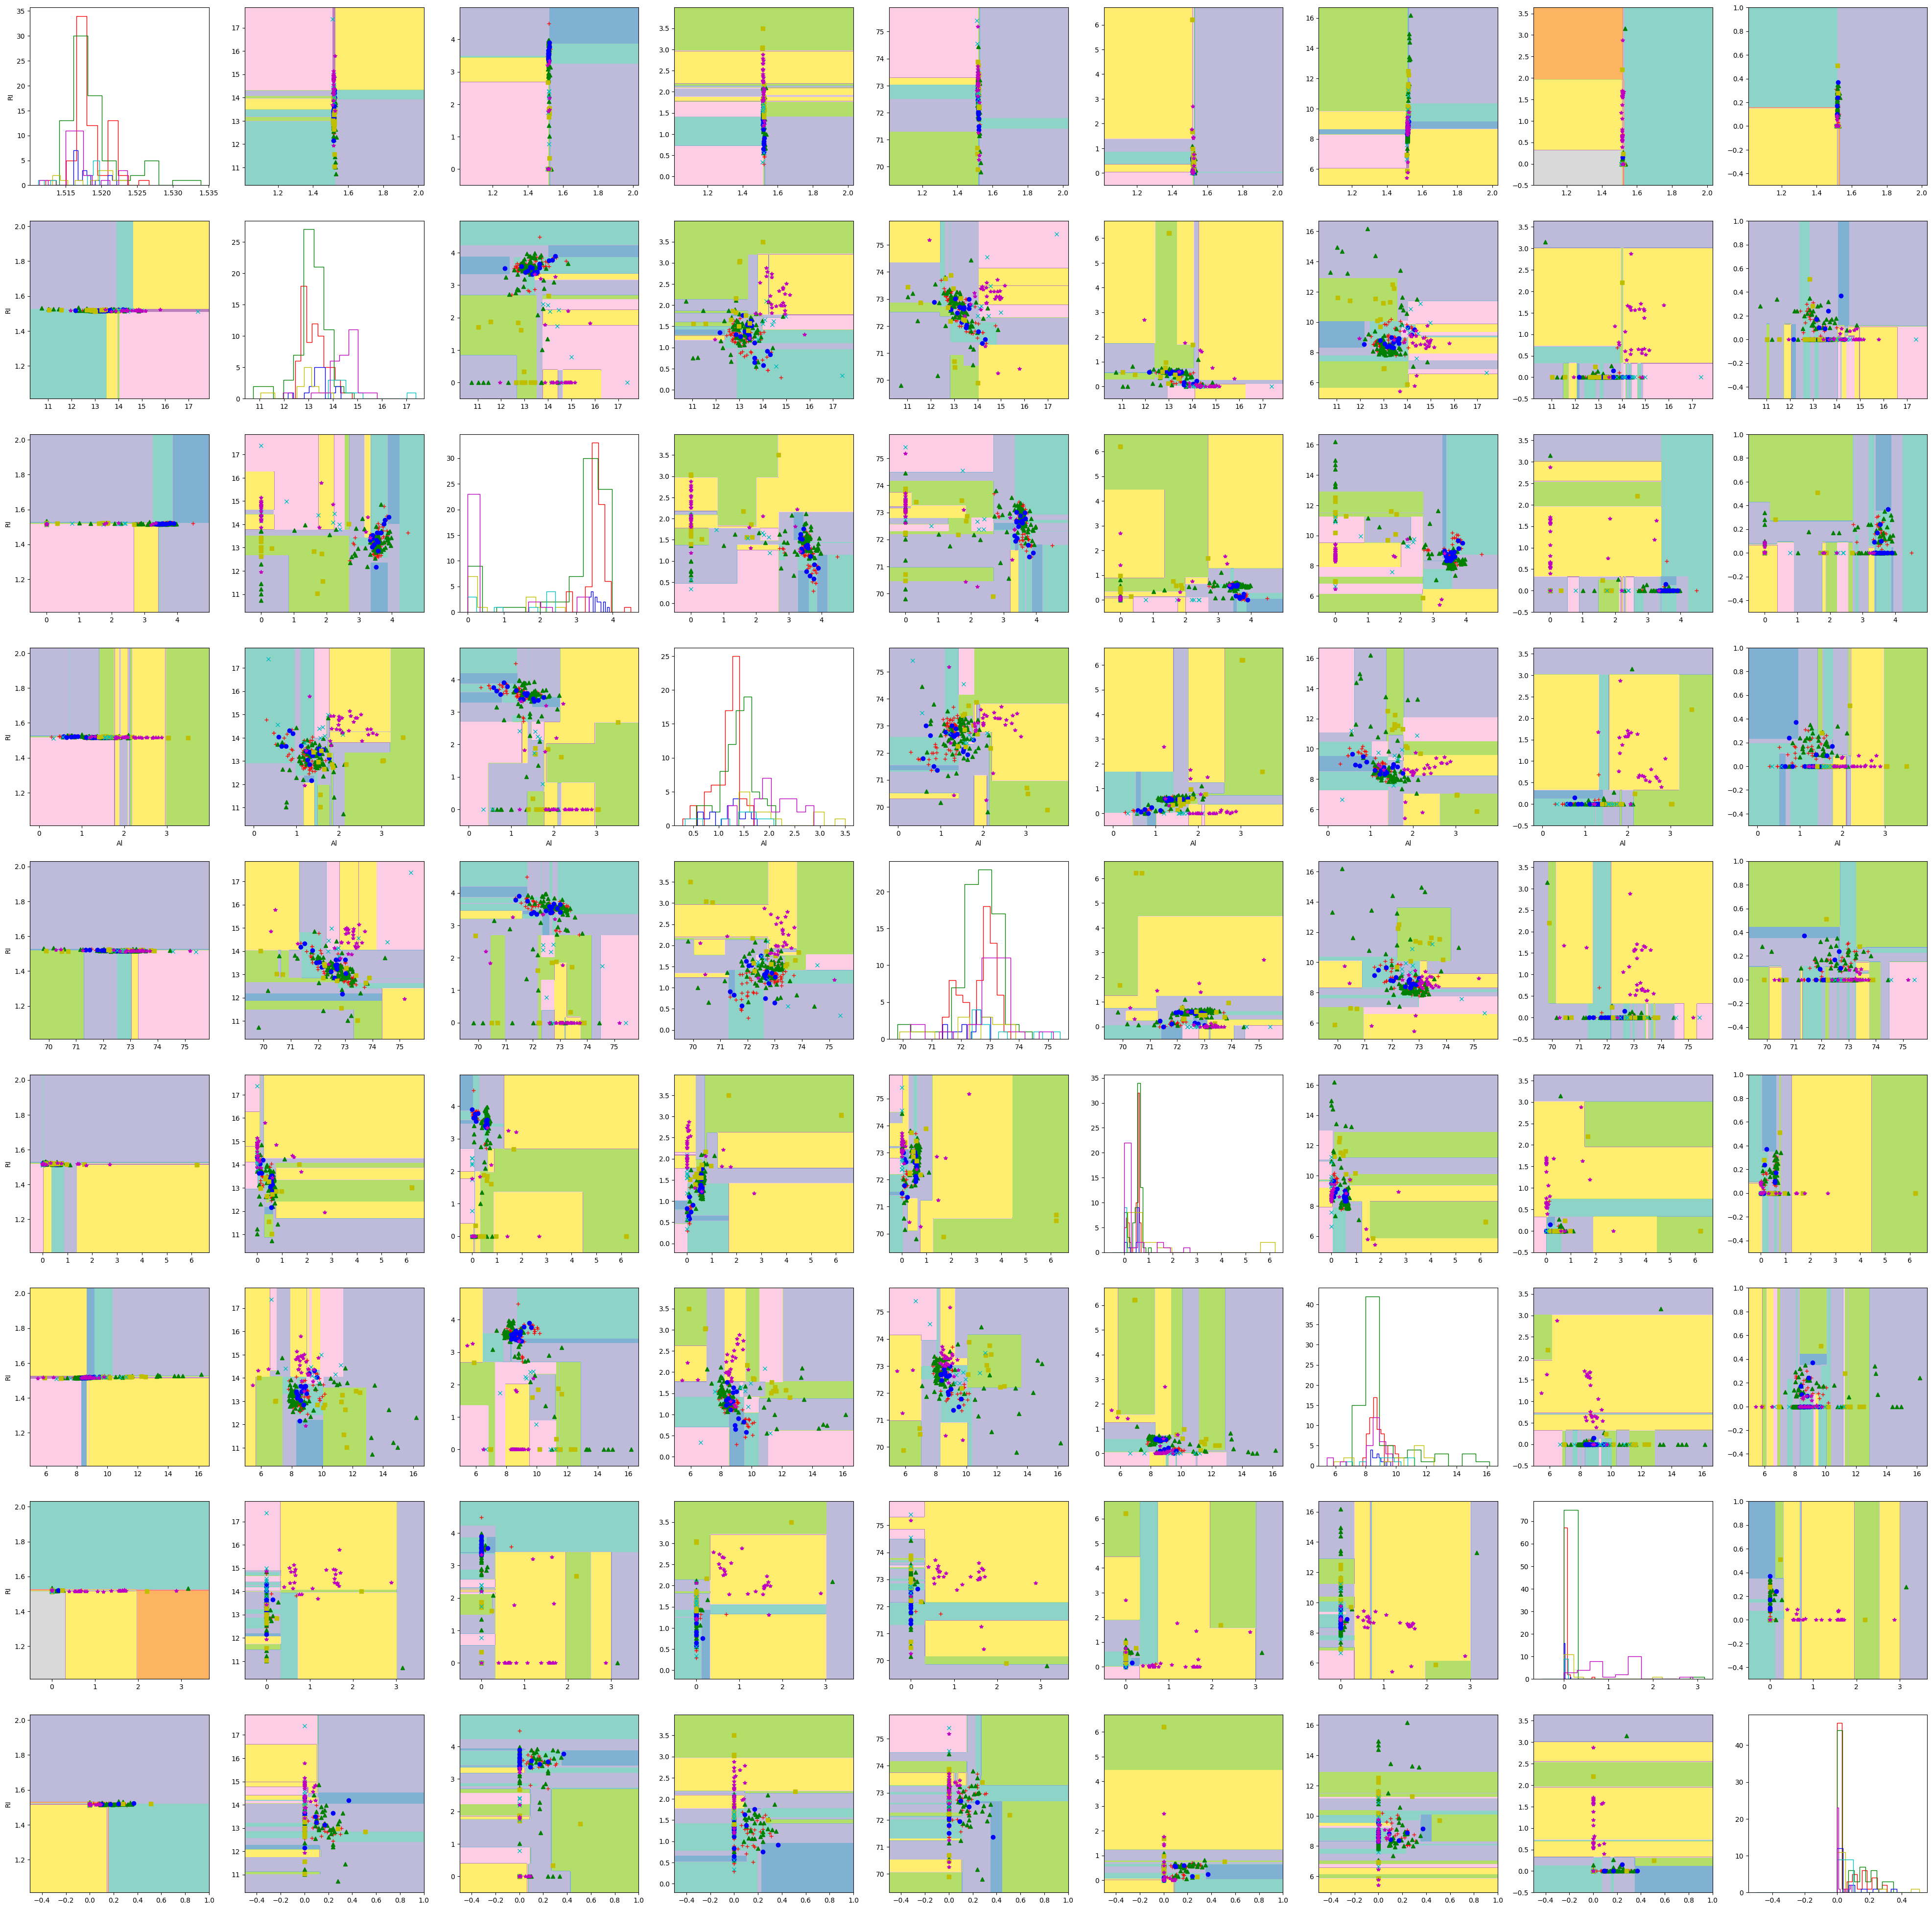

In [22]:
plot_markers = ['r+', 'g^', 'bo', 'ys', 'cx', 'm*', 'ro']
answers = dY.unique()

f, places = plt.subplots(9,9, figsize=(50,50))

fmin = dX.min()- 0.5
fmax = dX.max() +0.5
plot_step = 0.02

for i in range(0,9):
    for j in range(0,9):

        if (i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                                 np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=6, random_state=21, max_features=3)
            model.fit(dX.iloc[:, [i,j]], dY)

            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            answers_mapping = {answer: idx for idx, answer in enumerate(answers)}
            p = np.array([answers_mapping[answer] for answer in p])
            p = p.reshape(xx.shape)
            places[i, j].contourf(xx, yy, p, cmap='Set3')

        for id_answer in range(len(answers)):
            idx = np.where(dY == answers[id_answer])
            if i==j:
                places[i,j].hist(dX.iloc[idx].iloc[:, i],
                                 color=plot_markers[id_answer][0],
                                 histtype = 'step')
            else:
                places[i,j].plot(dX.iloc[idx].iloc[:, i], dX.iloc[idx].iloc[:,j],
                                 plot_markers[id_answer],
                                 label= answers[id_answer], markersize=6)
        if j==0:
            places[i,j].set_ylabel(dX.columns[j])
        if i == 8:
            places[i,j].set_xlabel(dX.columns[i])

Получили множество графиков, на многих из которых отчетливо видны границы решающего дерева и соответствующие им точки разных классов. Но так как признаков в датасете достаточно много, для более отчетливой визуализаци лучше делать графики отдельно для нужных признаков

In [23]:
dX = d.iloc[:, 1:6]

C:\Users\denis\AppData\Local\Temp\ipykernel_21140\3116157312.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
C:\Users\denis\AppData\Local\Temp\ipykernel_21140\3116157312.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.arange(fmin[j], fmax[j], plot_step))
c:\Users\denis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\denis\AppData\Local\Temp\ipykernel_21140\3116157312.py:15: FutureWar

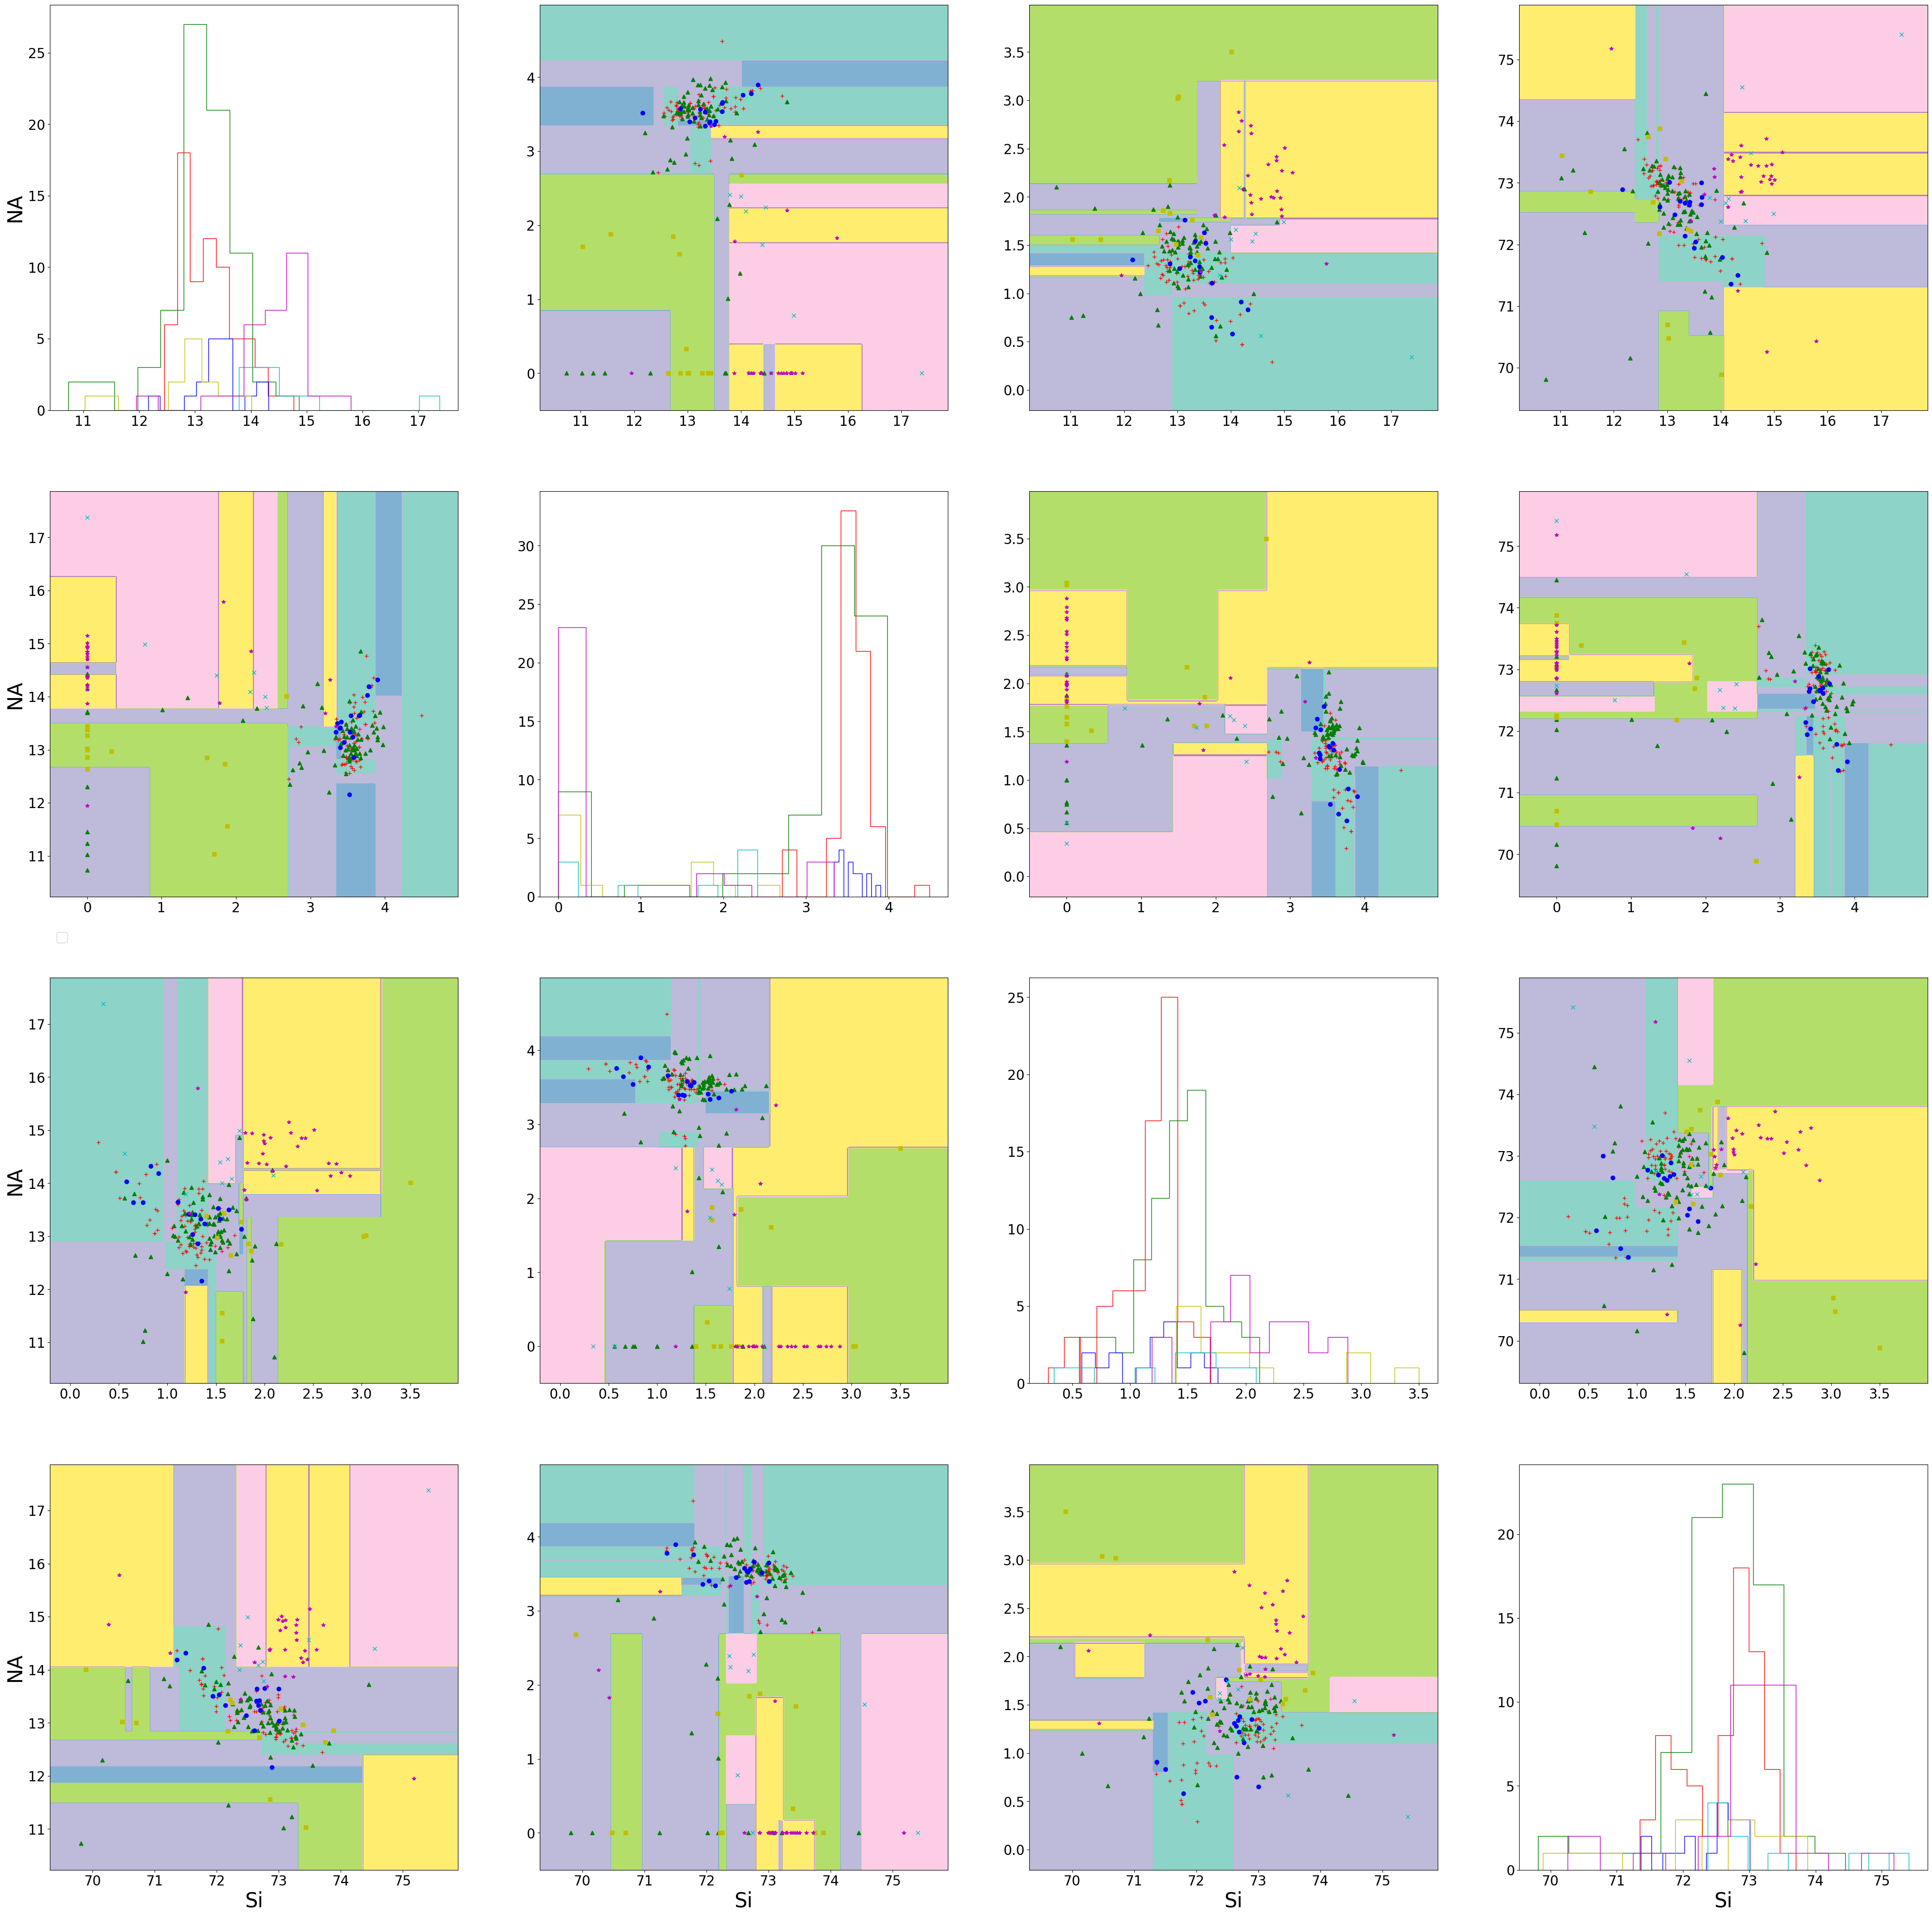

In [32]:
plot_markers = ['r+', 'g^', 'bo', 'ys', 'cx', 'm*', 'ro']
answers = dY.unique()

f, places = plt.subplots(4,4, figsize=(50,50))


fmin = dX.min()- 0.5
fmax = dX.max() +0.5
plot_step = 0.02

for i in range(0,4):
    for j in range(0,4):

        if (i != j):
            xx, yy = np.meshgrid(np.arange(fmin[i], fmax[i], plot_step),
                                 np.arange(fmin[j], fmax[j], plot_step))
            model = DecisionTreeClassifier(max_depth=6, random_state=21, max_features=3)
            model.fit(dX.iloc[:, [i,j]], dY)

            p = model.predict(np.c_[xx.ravel(), yy.ravel()])
            answers_mapping = {answer: idx for idx, answer in enumerate(answers)}
            p = np.array([answers_mapping[answer] for answer in p])
            p = p.reshape(xx.shape)
            places[i, j].contourf(xx, yy, p, cmap='Set3')

        for id_answer in range(len(answers)):
            idx = np.where(dY == answers[id_answer])
            if i==j:
                places[i,j].hist(dX.iloc[idx].iloc[:, i],
                                 color=plot_markers[id_answer][0],
                                 histtype = 'step')
                places[i, j].tick_params(axis='y', labelsize=20)
                places[i, j].tick_params(axis='x', labelsize=20)
            else:
                places[i,j].plot(dX.iloc[idx].iloc[:, i], dX.iloc[idx].iloc[:,j],
                                 plot_markers[id_answer],
                                 label= answers[id_answer], markersize=6)
                places[i, j].tick_params(axis='y', labelsize=20)
                places[i, j].tick_params(axis='x', labelsize=20)
        if j == 0:
            places[i, j].set_ylabel(dX.columns[j], fontsize=30)
            places[i, j].tick_params(axis='y', labelsize=20)
            places[i, j].tick_params(axis='x', labelsize=20)
        if i == 3:
            places[i, j].set_xlabel(dX.columns[i], fontsize=30)
            places[i, j].tick_params(axis='x', labelsize=20)
            places[i, j].tick_params(axis='y', labelsize=20)
legend_ax = f.add_subplot(111)  
legend_ax.set_axis_off()  # Убираем оси

# Создаем легенду для маркеров
legend_ax.legend(answers, loc='center left', fontsize=20) 

Как видно из графиков, по одной паре признаков почти нельзя установить класс объекта, все они имеют разную информативность поэтому для корректного обучения надо использовать сразу несколько признаков, обладающих наибольшей информативностью

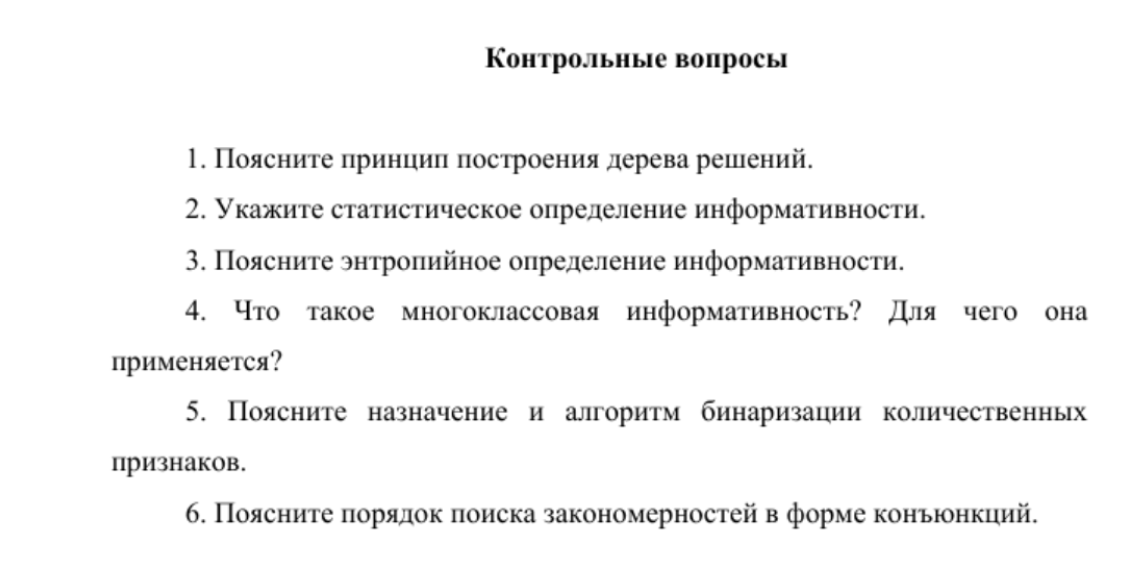

1. Дерево решений начинается с корневого узла, где данные разделяются на подгруппы(ветви) на основе значений одного из признаков.Каждая подгруппа образует новый узелю. Такое разделение продолжается пока не будет выполнен критерий остановки(в нашем случая max_depth и max_features).
2. Информативность (или прирост информации) - это мера, которая показывает, насколько разделение данных по конкретному признаку снизит неопределенность в данных. Чем выше информативность, тем более важен данный признак для построения дерева решений, так как он вносит больше информации о целевой переменной.
3. Информативность признака вычисляется как разница между энтропией до и после разделения данных по признаку.
4. Многоклассовая информативность (multi-class information gain) - это мера, используемая в задачах классификации для оценки информативности признаков при разделении данных на несколько классов. Она аналогична информативности, но применяется в контексте многоклассовой классификации, где целевая переменная имеет более двух классов.

Многоклассовая информативность используется для определения того, какой признак лучше всего разделяет данные на несколько классов. Чем выше информативность, тем более информативен признак для разделения данных на классы.


5. Бинаризация количественных признаков - это процесс преобразования непрерывных числовых значений признака в бинарные значения на основе некоторого порогового значения. Назначение бинаризации заключается в том, чтобы преобразовать количественные данные в категориальные или бинарные формы для упрощения анализа или использования в алгоритмах машинного обучения, которые работают с категориальными данными.

Алгоритм бинаризации количественных признаков обычно заключается в следующих шагах:

Выбор порогового значения: Определение значения, которое будет использоваться в качестве порога для разделения данных на два бинарных класса.

Преобразование: Преобразование значений признака на основе выбранного порога. Обычно признак разделяется на два класса: один класс содержит все значения признака, которые меньше или равны пороговому значению, а другой класс содержит все значения признака, которые больше порогового значения.

Применение к модели: Преобразованные бинарные признаки могут быть использованы в алгоритмах машинного обучения, которые работают с категориальными данными или требуют бинарных входных данных.
6. В контексте дерева решений, выявление закономерностей в форме конъюнкций происходит какраз при построении дерева. При движении от корня к листьям, конъюнкция условий во встречающихся узлах и будет искомой формой закономерности.